In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import calinski_harabasz_score, silhouette_score,silhouette_samples, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
%pip install yellowbrick

In [ ]:
%pip install seaborn

In [ ]:
%pip install Kneed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cardio=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Processed_dataset.csv')
df=pd.DataFrame(cardio)

In [ ]:
#These columns don’t contain meaningful information for clustering
unnamed_cols = [col for col in df.columns if 'Unnamed' in col]
df = df.drop(columns=unnamed_cols)

In [ ]:
#Removing the ID column because it doesn’t contain meaningful information for clustering, also droping the target column "cardio"
features = df.drop(['cardio', 'id'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform (features)

# Create a new DataFrame with the scaled features
cardio_scaled = pd.DataFrame(scaled_features, columns=features. columns)

print ("\nScaled DataFrame:")
print(cardio_scaled.head ())


Scaled DataFrame:
        age    gender    height    weight     ap_hi     ap_lo  cholesterol  \
0 -0.436062  1.364055  0.443452 -0.847873 -0.122182 -0.088238    -0.539322   
1  0.307686 -0.733108 -1.018168  0.749831  0.072610 -0.035180     2.400793   
2 -0.247997 -0.733108  0.078047 -0.708942  0.007679 -0.141297     2.400793   
3 -0.748152  1.364055  0.565254  0.541435  0.137541  0.017879    -0.539322   
4 -0.808543 -0.733108 -1.018168 -1.264666 -0.187113 -0.194356    -0.539322   

      gluc     smoke      alco    active  discretized_age  cardio-pie  
0 -0.39572 -0.310879 -0.238384  0.494167        -0.842740     -0.9994  
1 -0.39572 -0.310879 -0.238384  0.494167         0.838945      1.0006  
2 -0.39572 -0.310879 -0.238384 -2.023607        -0.842740      1.0006  
3 -0.39572 -0.310879 -0.238384  0.494167        -0.842740      1.0006  
4 -0.39572 -0.310879 -0.238384 -2.023607        -0.842740     -0.9994  


## 1- Cluster Visualization for k=2:




In [ ]:
np. random. seed (98)
kmeans1 = KMeans (n_clusters=2, random_state=98)
kmeans_result1 = kmeans1. fit(cardio_scaled)
print("Cluster Centers:")
print(kmeans_result1.cluster_centers_)
print("\nCluster Labels:")
print (kmeans_result1. labels_)

Cluster Centers:
[[-0.93828503  0.02909693  0.08207607 -0.05574829 -0.03268176 -0.02826957
  -0.16949721 -0.11932527  0.0478253   0.02918245  0.00769131 -1.0393355
  -0.22698491]
 [ 0.74655072 -0.0231511  -0.06530419  0.04435638  0.02600339  0.02249281
   0.13486122  0.09494169 -0.03805241 -0.02321915 -0.00611963  0.82695198
   0.18060157]]

Cluster Labels:
[0 1 0 ... 0 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


The average silhouette score is: 0.16046246000616163


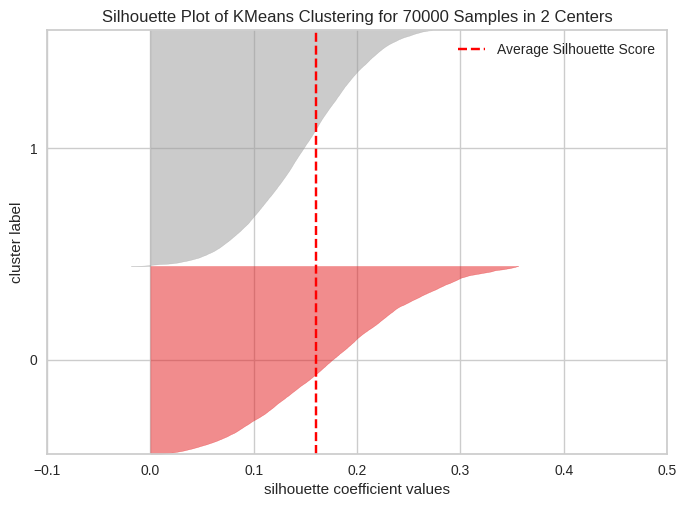

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 70000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer (kmeans1, color="yellowbrick")
visualizer.fit(cardio_scaled)
print("The average silhouette score is:", visualizer.silhouette_score_)
visualizer.show()

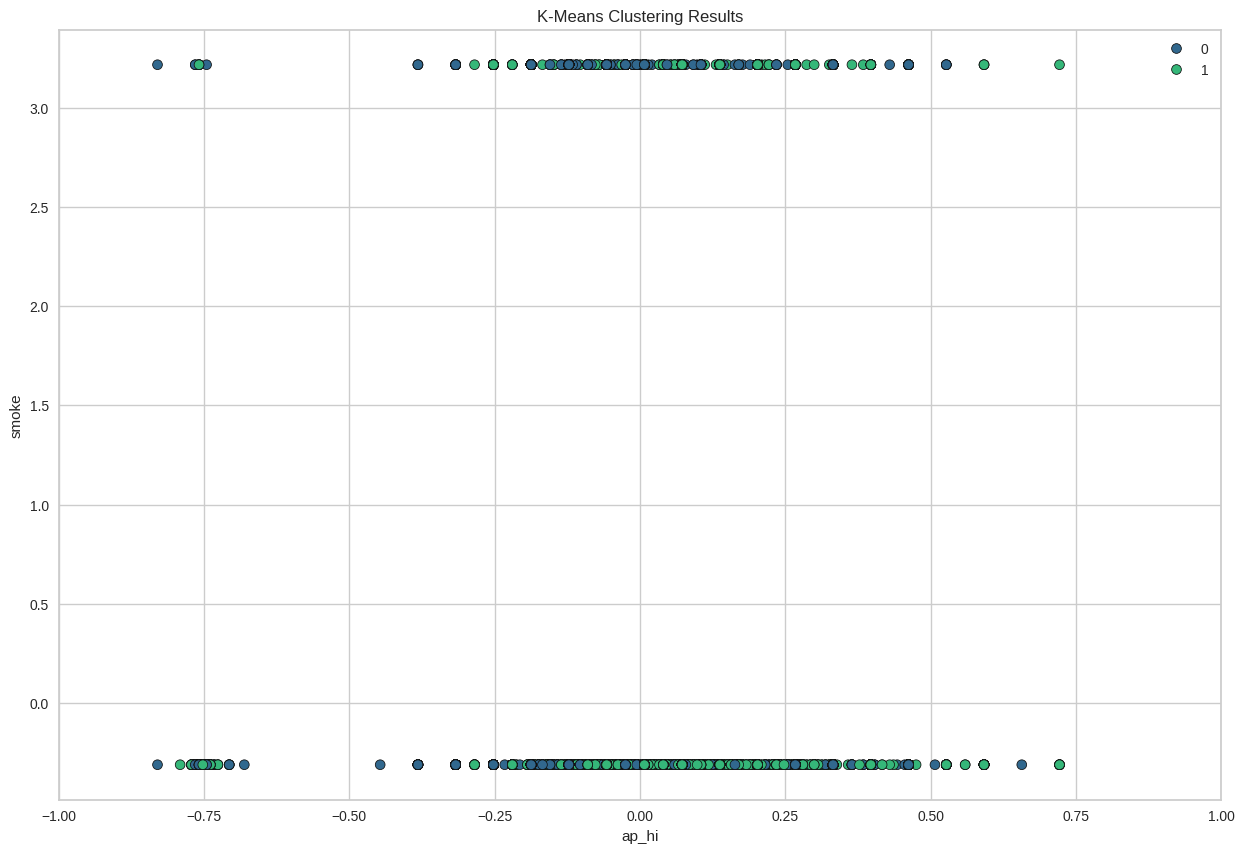

In [ ]:
cardio_scaled ['Cluster'] = kmeans_result1. labels_
plt.figure(figsize=(15, 10))
sns.scatterplot(x=cardio_scaled.columns [4], y=cardio_scaled.columns [8], hue='Cluster',data=cardio_scaled, palette='viridis',edgecolor='k')
plt. title('K-Means Clustering Results')
plt.xlim(-1,1)
plt.xlabel(cardio_scaled.columns [4])
plt.ylabel(cardio_scaled.columns [8])
plt. legend()
plt.show()

### In this plot, the clusters are closely gathered and not clearly separated, making it hard to see their differences.

## 2- Cluster Visualization for k=4:


In [ ]:
np. random. seed (98)
kmeans2 = KMeans (n_clusters=4, random_state=98)
kmeans_result2 = kmeans2. fit(cardio_scaled)
print("Cluster Centers:")
print(kmeans_result2.cluster_centers_)
print("\nCluster Labels:")
print (kmeans_result2. labels_)

Cluster Centers:
[[-9.54106730e-01 -1.06997091e-01  3.54987274e-03 -1.31449088e-01
  -3.85746396e-02 -3.77611085e-02 -3.17309222e-01 -2.53758796e-01
  -3.07317452e-01 -1.63494789e-01 -4.08835849e-03 -1.05178370e+00
  -2.82534686e-01 -3.66373598e-13]
 [ 5.31098773e-01 -1.73142639e-01 -1.59688251e-01  3.33771524e-01
   1.10934570e-01  6.27097180e-02  1.81420100e+00  1.60896545e+00
  -2.44651899e-01 -7.58846907e-02  1.02202748e-02  4.79955721e-01
   4.82670217e-01  8.18615278e-01]
 [ 7.37479479e-01 -1.12415065e-01 -1.05146579e-01 -6.03866260e-02
  -4.17294244e-03  7.45453639e-03 -3.58835564e-01 -3.26977626e-01
  -3.08957096e-01 -1.75097649e-01 -2.33804150e-02  8.38639177e-01
   1.01144878e-01  1.00000000e+00]
 [-1.62384095e-01  1.14147561e+00  6.63086919e-01  2.53654743e-01
  -1.28708114e-03  2.04245621e-02 -3.21389984e-02 -9.94014380e-02
   2.83857956e+00  1.47241789e+00  9.71218637e-02 -1.25521469e-01
  -5.53230406e-02  4.80156344e-01]]

Cluster Labels:
[0 1 1 ... 3 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


The average silhouette score is: 0.1945386826754917


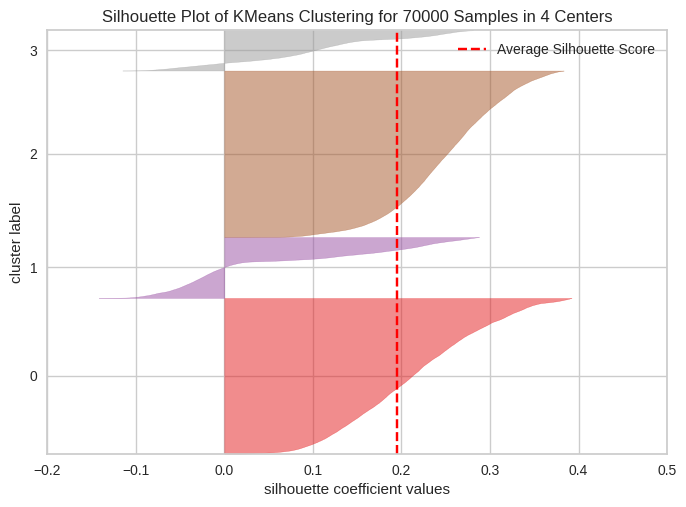

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 70000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer (kmeans2, color="yellowbrick")
visualizer.fit(cardio_scaled)
print("The average silhouette score is:", visualizer.silhouette_score_)
visualizer.show()

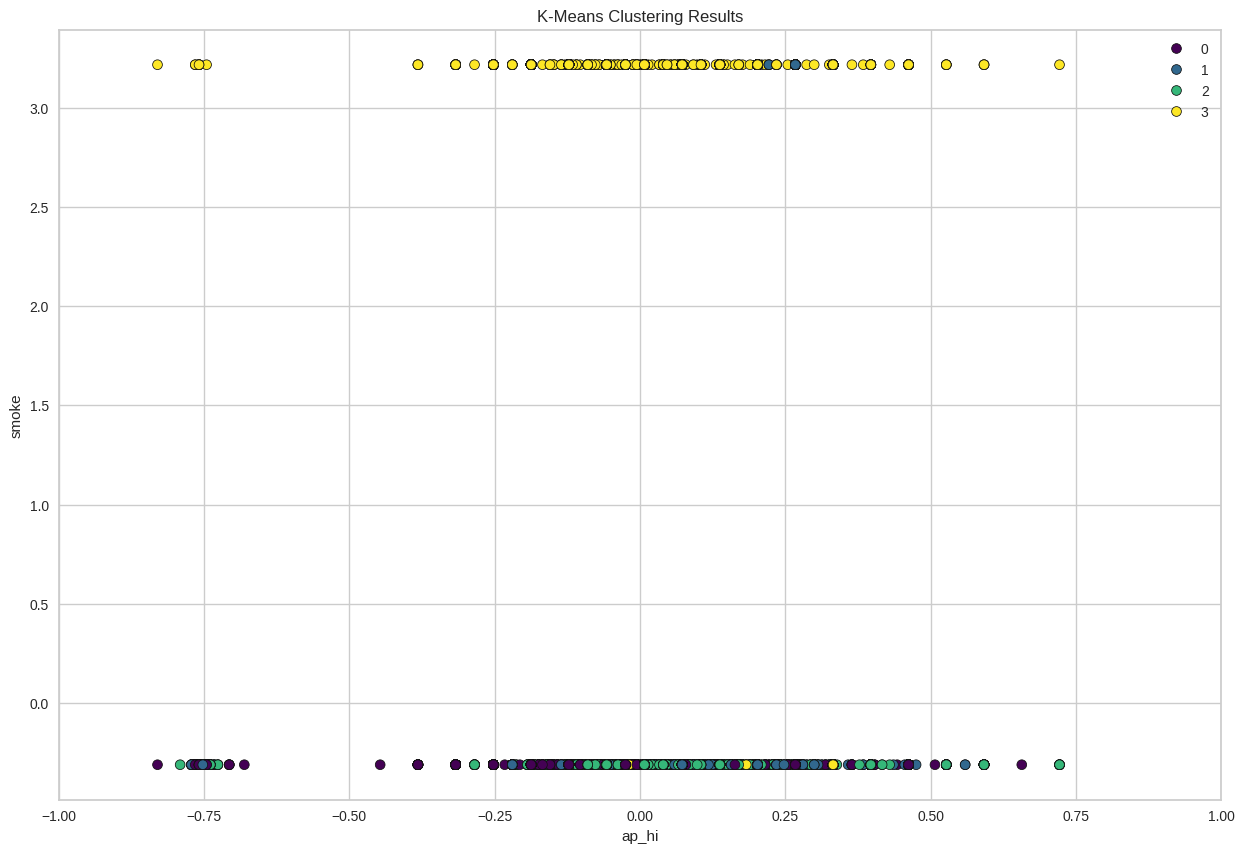

In [ ]:
cardio_scaled ['Cluster'] = kmeans_result2. labels_
plt.figure(figsize=(15, 10))
sns.scatterplot(x=cardio_scaled.columns [4], y=cardio_scaled.columns [8], hue='Cluster',data=cardio_scaled, palette='viridis',edgecolor='k')
plt. title('K-Means Clustering Results')
plt.xlim(-1,1)
plt.xlabel(cardio_scaled.columns [4])
plt.ylabel(cardio_scaled.columns [8])
plt. legend()
plt.show()

### This plot shows four clusters with more spread and density, but there is still significant overlap among the clusters. The clusters are densely packed and not clearly separated.

## 3- Cluster Visualization for k=8:




In [ ]:
np. random. seed (98)
kmeans3 = KMeans (n_clusters=8, random_state=98)
kmeans_result3 = kmeans3. fit(cardio_scaled)
print("Cluster Centers:")
print(kmeans_result3.cluster_centers_)
print("\nCluster Labels:")
print (kmeans_result3. labels_)

Cluster Centers:
[[-9.72582121e-01  1.32943503e+00  7.85780499e-01  1.87969353e-01
  -2.41543287e-02 -2.12419404e-02 -2.89925678e-01 -2.35288440e-01
  -3.10879125e-01 -2.38384360e-01 -4.35974559e-02 -1.04518325e+00
  -1.78574635e-01  2.46349206e-02]
 [ 7.43652237e-01 -1.15064845e-01 -8.81005470e-02  2.40141299e-02
  -2.07560663e-03 -1.47514456e-02 -1.04735643e-01 -1.68271301e-01
  -3.01132979e-01 -2.38384360e-01 -2.02360695e+00  8.16487722e-01
   2.38973028e-01  1.85510361e+00]
 [ 5.36299671e-01 -2.05347025e-01 -1.87848668e-01  3.07107163e-01
   1.22980290e-01  3.33579743e-02  1.86337092e+00  1.73322883e+00
  -2.37960034e-01 -2.17275905e-01  2.28091813e-01  4.87804243e-01
   4.69419037e-01  9.99767739e-01]
 [ 7.36068800e-01 -1.10327399e-01 -1.05763898e-01 -7.09621554e-02
  -3.54972448e-03 -9.52798159e-03 -3.61451832e-01 -3.28623104e-01
  -3.10715342e-01 -2.38384360e-01  4.94167111e-01  8.38944605e-01
   7.90659814e-02  2.00000000e+00]
 [-9.38866694e-01 -7.23712020e-01 -3.27569400e-01 -

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


The average silhouette score is: 0.2264769781440047


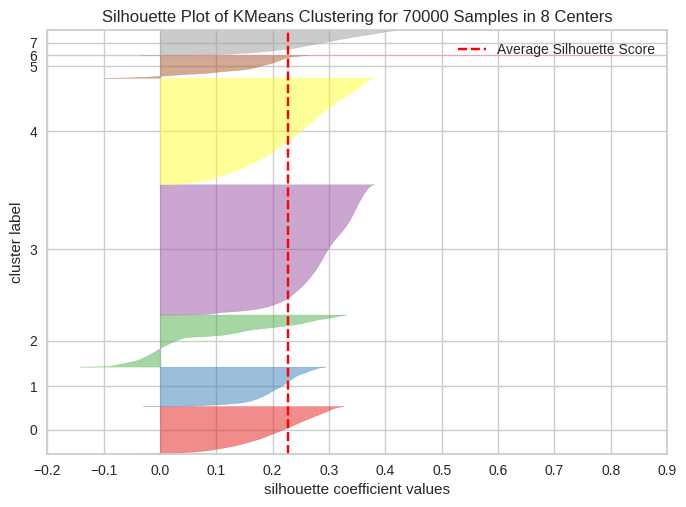

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 70000 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer (kmeans3, color="yellowbrick")
visualizer.fit(cardio_scaled)
print("The average silhouette score is:", visualizer.silhouette_score_)
visualizer.show()

###We can see that the average silhouette score for 8 clusters is 0.22, which is the highest so far in comparison to the previously calculated scores for the other sizes of k (k=2 and k=4).



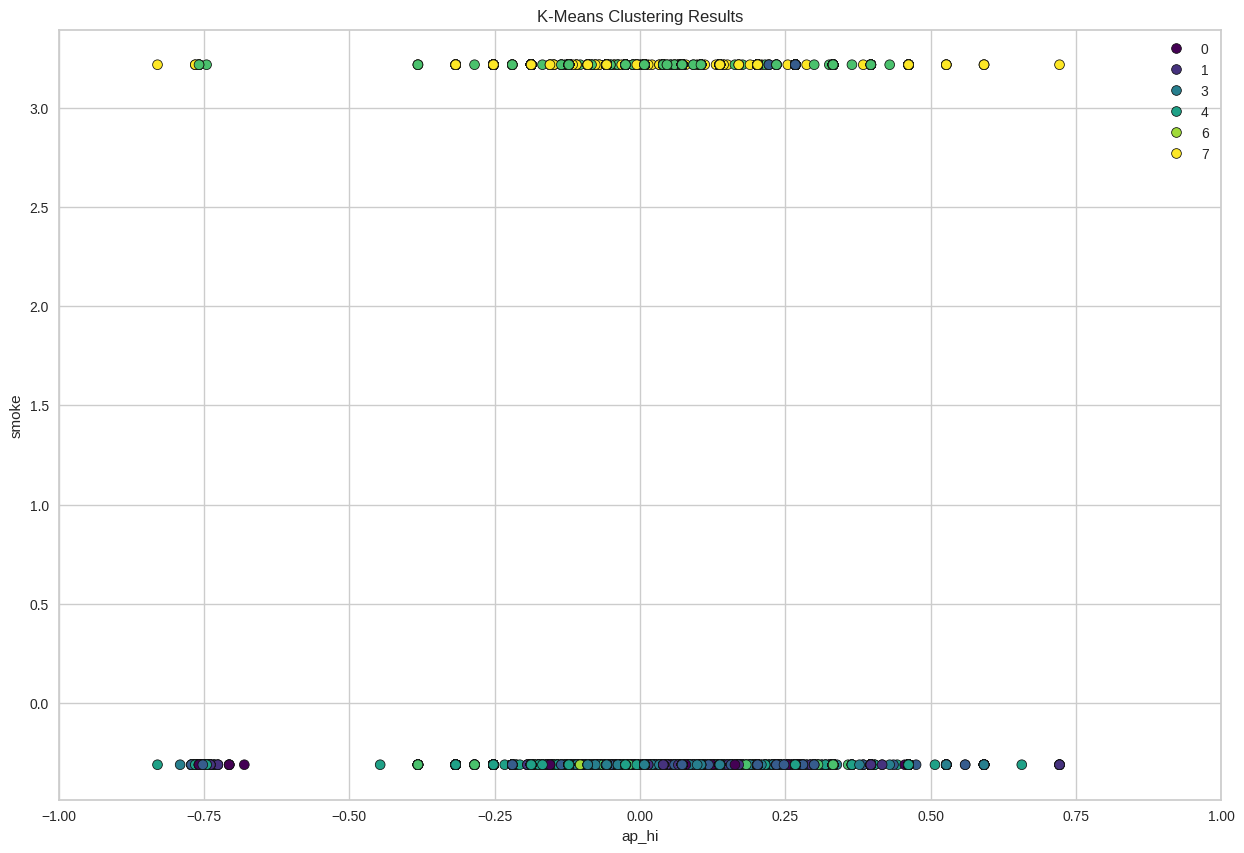

In [ ]:
cardio_scaled ['Cluster'] = kmeans_result3. labels_
plt.figure(figsize=(15, 10))
sns.scatterplot(x=cardio_scaled.columns [4], y=cardio_scaled.columns [8], hue='Cluster',data=cardio_scaled, palette='viridis',edgecolor='k')
plt. title('K-Means Clustering Results')
plt.xlim(-1,1)
plt.xlabel(cardio_scaled.columns [4])
plt.ylabel(cardio_scaled.columns [8])
plt. legend()
plt.show()

### This plot shows eight clusters with more distinct clusters, even tho there is still overlap among the clusters.

### *(The features 4 (ap_hi) and 8 (smoke) were selected as they represent one of the combinations with negative or no correlation, capturing different aspects of the data most effectively.)*

# Determine Best number of clusters (Optimal k):

In [ ]:
# Range of clusters to try
k_range = range(2, 10)
# Lists to store scores
ch_scores = []
silhouette_scores = []
# Calculate scores for each value of k
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=98)
  kmeans. fit (cardio_scaled)
  ch_score = calinski_harabasz_score(cardio_scaled, kmeans. labels_)
  silhouette_avg = silhouette_score(cardio_scaled, kmeans. labels_)
  ch_scores. append (ch_score)
  silhouette_scores. append (silhouette_avg)

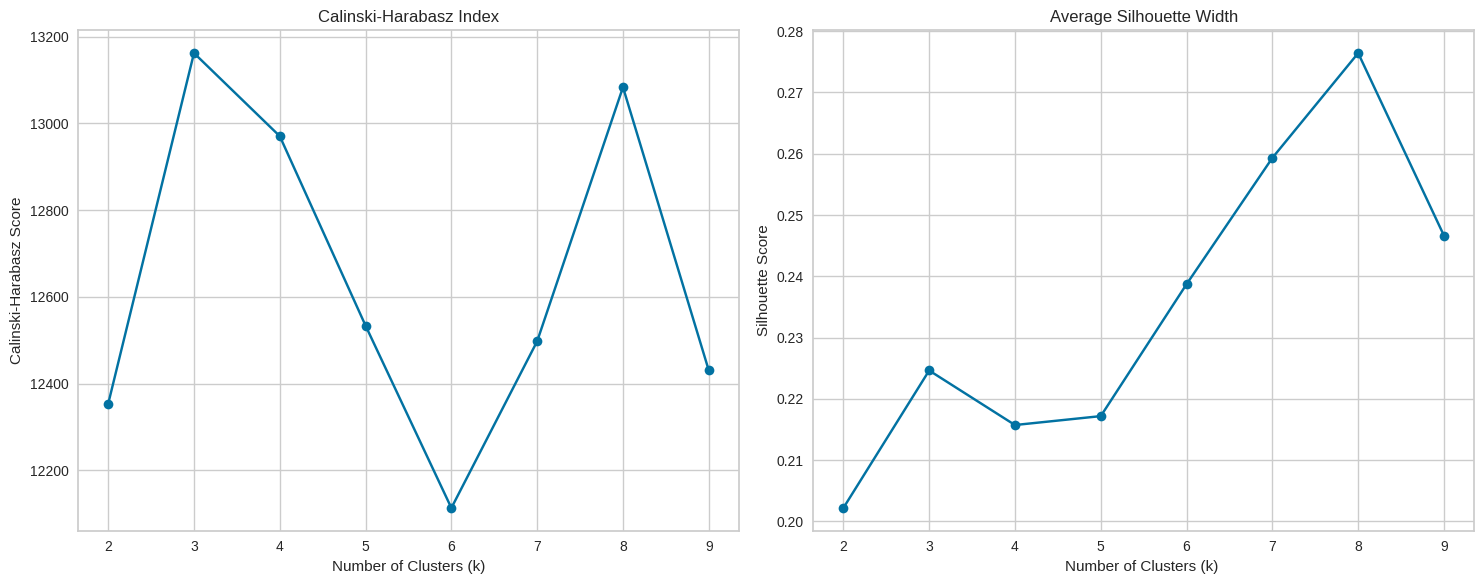

In [ ]:
# Plotting results
plt.figure(figsize=(15, 6))
# Plot Calinski-Harabasz Index
plt.subplot(1, 2, 1)
plt.plot(k_range, ch_scores, marker='o' )
plt.title( 'Calinski-Harabasz Index')
plt.xlabel( 'Number of Clusters (k)')
plt. ylabel ('Calinski-Harabasz Score')
# Plot Average Silhouette Width
plt.subplot (1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title( 'Average Silhouette Width')
plt. xlabel( 'Number of Clusters (k) ')
plt.ylabel( 'Silhouette Score')
plt. tight_layout ( )
plt. show()

### After analyzing the plotting results, we have determined that the most effective number of clusters in the range for our dataset is 8. Using this optimal number gives us clearer insights into the data patterns.

# Validating that k=8 is the optimal number of clusters:

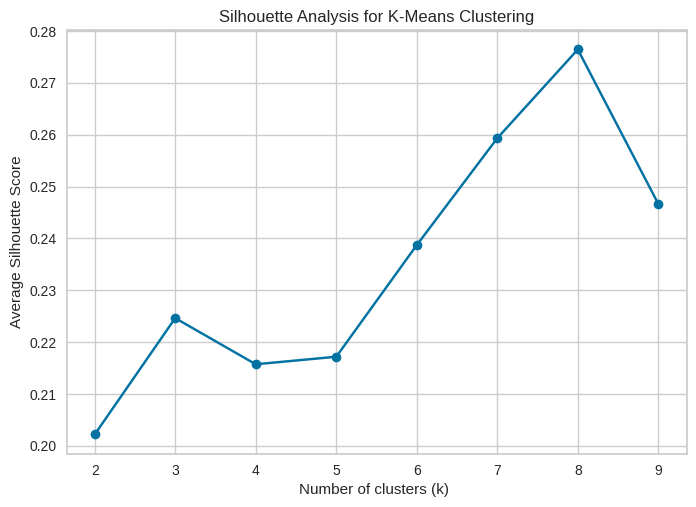

In [ ]:
#Silhouette-cluster validation method
k_values = range (2,10 )
silhouette_avg_values = []
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=98)
  kmeans_result = kmeans. fit(cardio_scaled)
  silhouette_avg = silhouette_score(cardio_scaled, kmeans_result. labels_)
  silhouette_avg_values.append (silhouette_avg)
# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title( 'Silhouette Analysis for K-Means Clustering')
plt.xlabel( 'Number of clusters (k) ')
plt.ylabel( 'Average Silhouette Score')
plt. show()

### We used the Silhouette-cluster method to evaluate our clustering and found that the best number of clusters (k) is 8. The silhouette scores showed that with k set to 8, the average score was highest, indicating that the clusters are well-separated and cohesive. Therefore, 8 is the best choice for the number of clusters in our dataset.

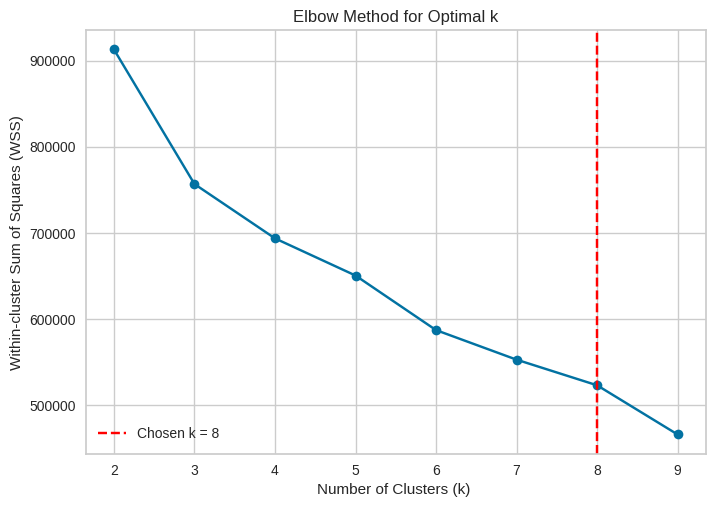

In [ ]:
#Elbow Method
from kneed import KneeLocator
wss_values = []
k_values = range (2, 10)
for k in k_values:
  kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k))
  kmeans. fit(cardio_scaled)
  wss_values. append (kmeans.named_steps ['kmeans']. inertia_)
# Plot the elbow method
plt. plot(k_values, wss_values, marker='o')
plt.xlabel( 'Number of Clusters (k) ')
plt.ylabel( 'Within-cluster Sum of Squares (WSS)')
plt.title( 'Elbow Method for Optimal k')
plt.axvline(x=8, linestyle='--', color='red', label='Chosen k = 8')
plt. legend()
plt. show()

### Also, using the elbow method, we see a sharp drop in inertia at point 8, after which it levels off. This means that 8 is the best number of clusters, as adding more does not improve the results.



---


## In conclusion, we can see that the clustering visualization of the optimal k (3-Cluster Visualization for k=8) with the features 4 (ap_hi) and 8 (smoke) did not yield the most distinct clusters.
## And after exploring all possible column combinations and researching why none of them worked, it seems that one reason could be that K-means clustering may not be the most suitable method for this dataset. Other clustering methods might be more effective.



---


# classification:



==== Data split: 90%-10% ====


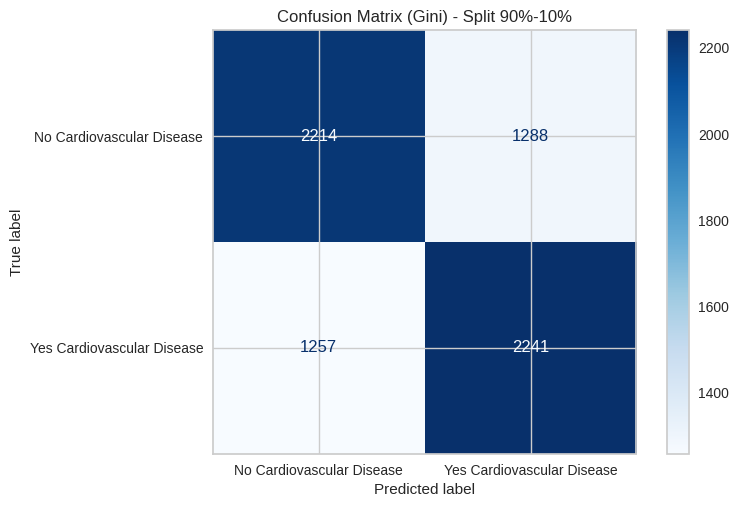


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.64      3502
           1       0.64      0.64      0.64      3498

    accuracy                           0.64      7000
   macro avg       0.64      0.64      0.64      7000
weighted avg       0.64      0.64      0.64      7000



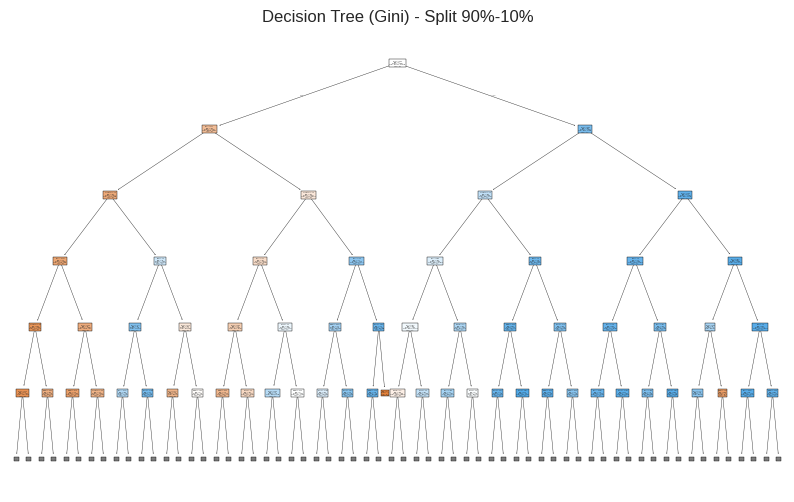



==== Data split: 80%-20% ====


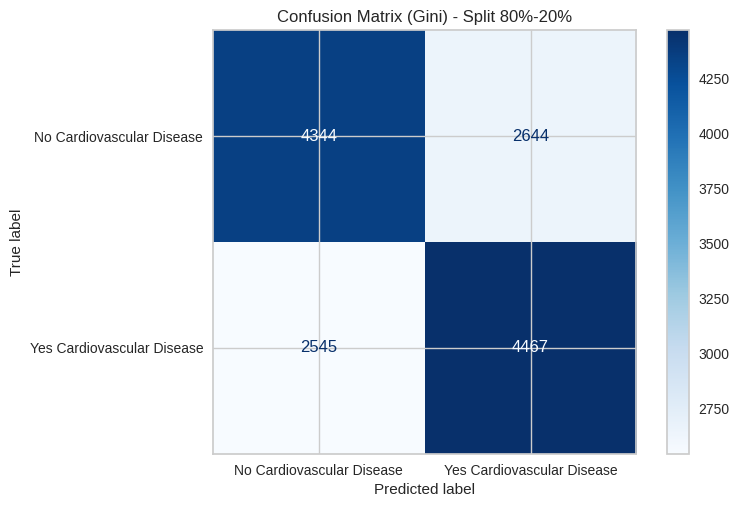


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.63      6988
           1       0.63      0.64      0.63      7012

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



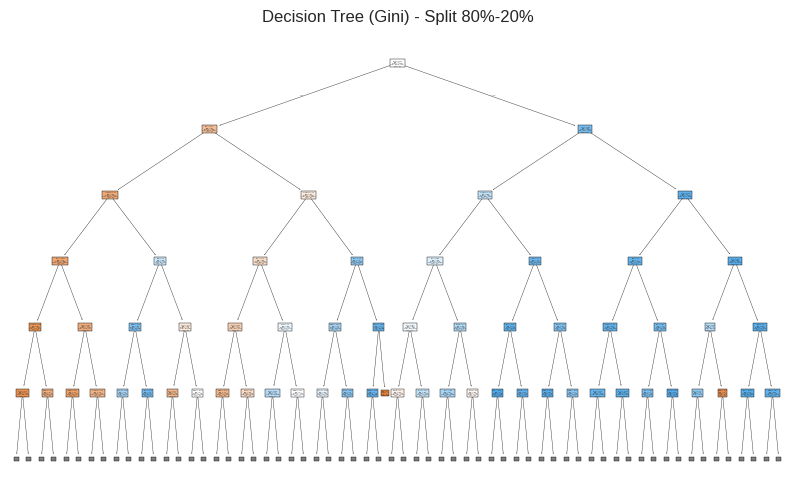



==== Data split: 70%-30% ====


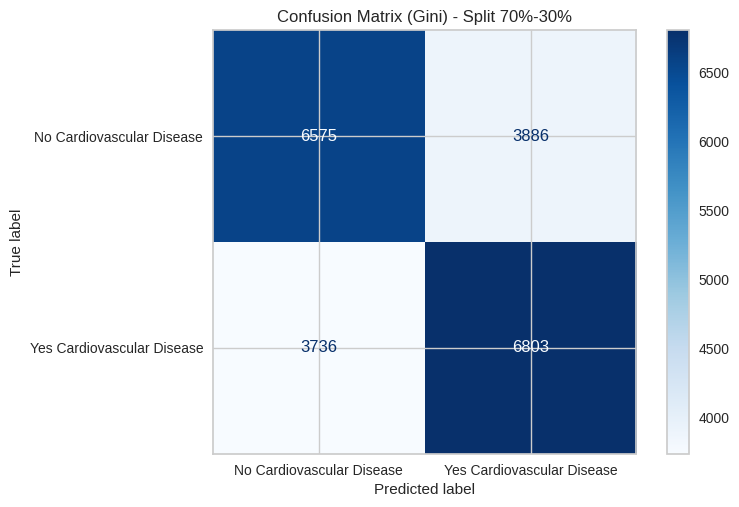


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.63     10461
           1       0.64      0.65      0.64     10539

    accuracy                           0.64     21000
   macro avg       0.64      0.64      0.64     21000
weighted avg       0.64      0.64      0.64     21000



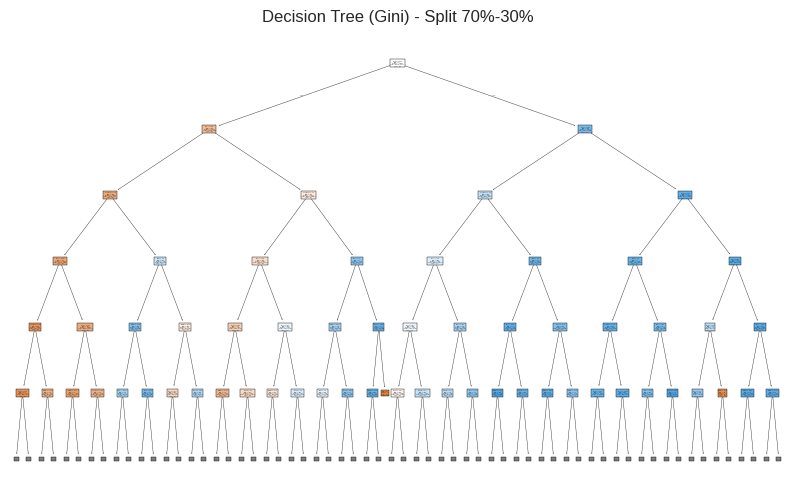



==== Data split: 90%-10% ====


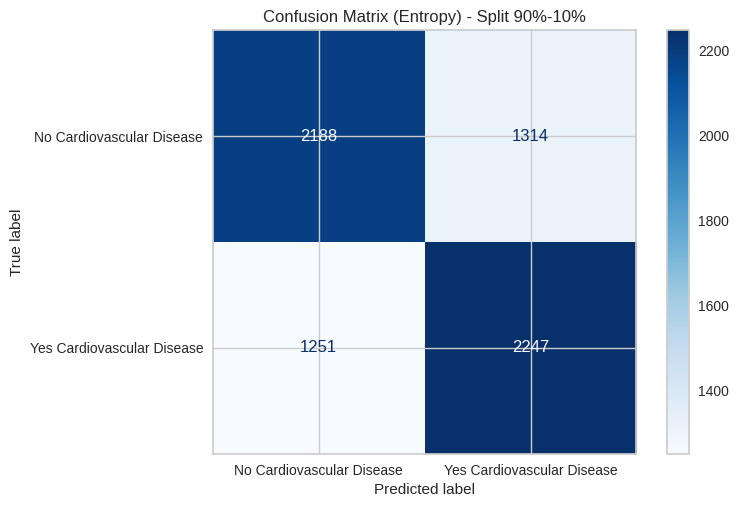


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      3502
           1       0.63      0.64      0.64      3498

    accuracy                           0.63      7000
   macro avg       0.63      0.63      0.63      7000
weighted avg       0.63      0.63      0.63      7000



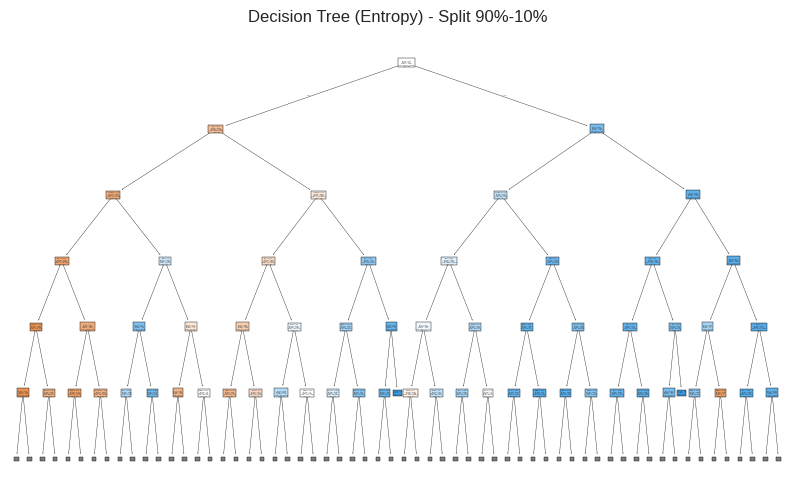



==== Data split: 80%-20% ====


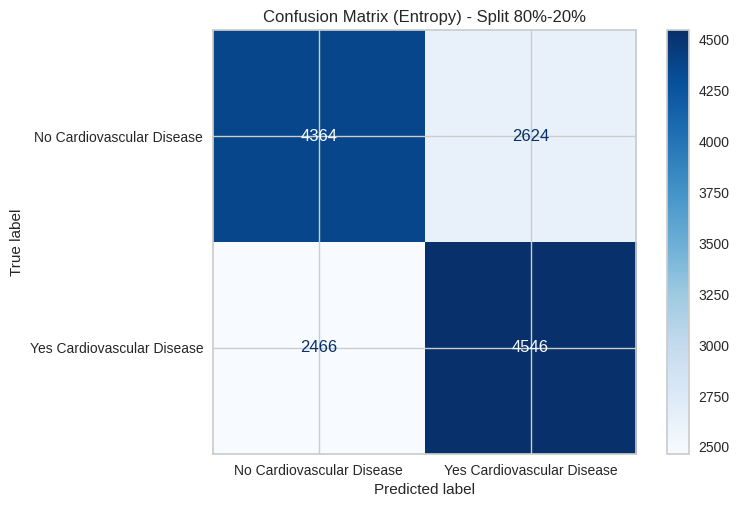


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      6988
           1       0.63      0.65      0.64      7012

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



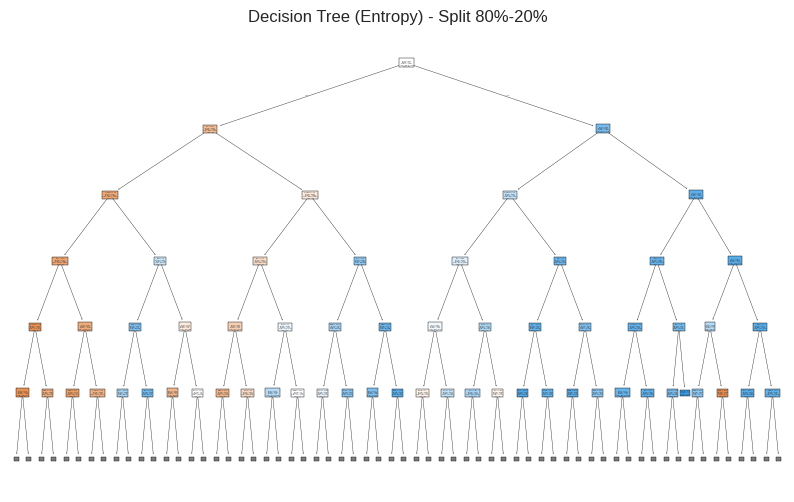



==== Data split: 70%-30% ====


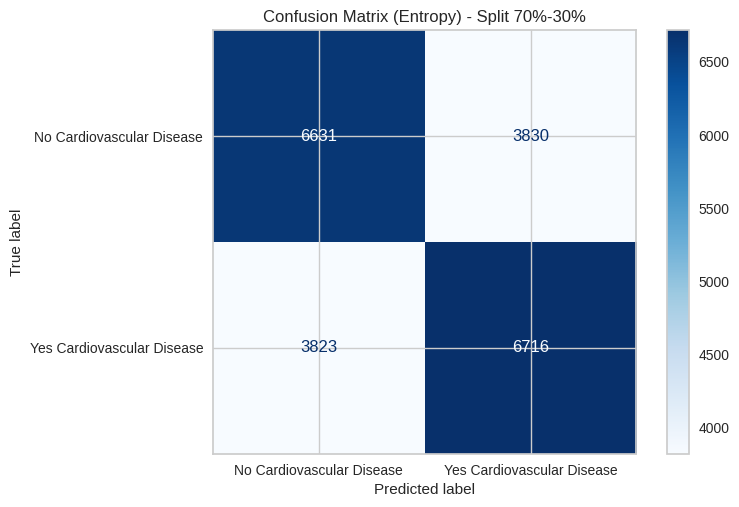


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63     10461
           1       0.64      0.64      0.64     10539

    accuracy                           0.64     21000
   macro avg       0.64      0.64      0.64     21000
weighted avg       0.64      0.64      0.64     21000



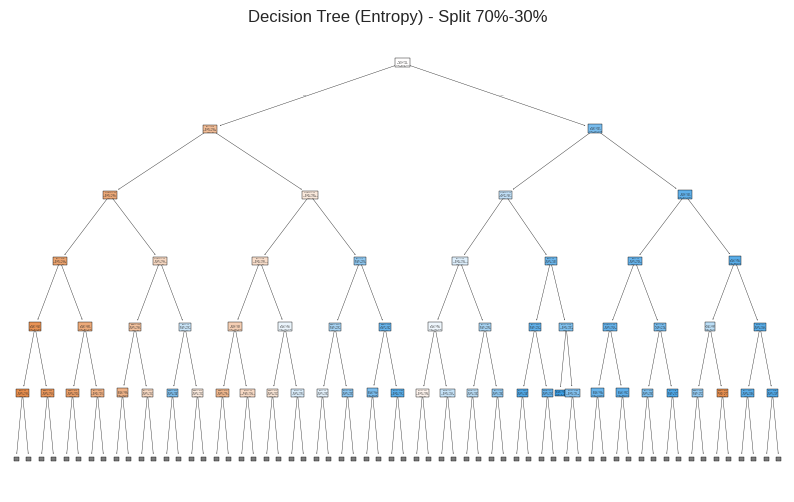

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/Processed_dataset.csv'
data = pd.read_csv(file_path)

X = data[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y = data['cardio']

splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]

# Loop for Gini criterion
for train_size, test_size in splits:
    print(f"\n\n==== Data split: {int(train_size*100)}%-{int(test_size*100)}% ====")
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)

    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
    clf_gini.fit(X_train, y_train)

    y_pred = clf_gini.predict(X_test)

    # Compute and display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    class_labels = {0: 'No Cardiovascular Disease', 1: 'Yes Cardiovascular Disease'}
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[0], class_labels[1]])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (Gini) - Split {int(train_size*100)}%-{int(test_size*100)}%")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(10, 6))
    plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], max_depth=5)
    plt.title(f"Decision Tree (Gini) - Split {int(train_size*100)}%-{int(test_size*100)}%")
    plt.show()

# Loop for Entropy criterion
for train_size, test_size in splits:
    print(f"\n\n==== Data split: {int(train_size*100)}%-{int(test_size*100)}% ====")
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)

    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
    clf_entropy.fit(X_train, y_train)

    y_pred = clf_entropy.predict(X_test)

    # Compute and display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[0], class_labels[1]])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (Entropy) - Split {int(train_size*100)}%-{int(test_size*100)}%")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(10, 6))
    plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], max_depth=5)
    plt.title(f"Decision Tree (Entropy) - Split {int(train_size*100)}%-{int(test_size*100)}%")
    plt.show()

If we compare between the two models:

**For the 90%-10% data split:**

-The Gini index model has a precision, recall, and f1-score of 0.64, and a support of 7000.

-The entropy model has a precision, recall, and f1-score of 0.63, and a support of 7000.

**For the 80%-20% data split:**

-The Gini index model has a precision of 0.63, recall of 0.62, f1-score of 0.63, and a support of 6988.

-The entropy model has a precision, recall, and f1-score of 0.63, and a support of 7000.

**For the 70%-30% data split:**

-The Gini index model has a precision, recall, and f1-score of 0.64, and a support of 21000.

-The entropy model has a precision, recall, and f1-score of 0.64, and asupport of 21000.

The results indicate that the Gini index and entropy models perform similarly, with the Gini index model having slightly higher precision, recall, and f1-score in the 90%-10% split, while the entropy model performs marginally better in the 80%-20% split.

The confusion matrices and decision tree visualizations also show similar decision boundaries and classifications between the two models.


In conclusion, our analysis of the Decision Tree classifiers using Gini Index and Information Gain (Entropy) revealed some interesting findings.

1. **Performance Comparison**: The models performed better with larger training sets (like 90%-10%) compared to smaller ones (like 70%-30%). More training data seemed to help improve predictions.

2. **Confusion Matrix Analysis**: We saw that both models could identify positive and negative cases, but there were some mistakes, especially in the smaller training sets. High false positive rates in some cases indicated challenges in differentiating between classes.

3. **Feature Impact**: The features we used, such as age, gender, and health metrics (like ap_hi and ap_lo), were relevant, but the complexity of the data might have made it hard for the models to capture the right patterns.

Overall, while the Decision Tree models gave us useful insights, they may not be the best fit for this dataset. We could consider looking into other classification methods or refining our current approach to improve performance and predictions.


*UPDATED WITH FEEDBACK FROM INSTRUCTER:*

To evaluate the performance of Decision Tree classifiers using the Gini Index and Entropy, we split the data into training and testing sets in three ways: 90%-10%, 80%-20%, and 70%-30%. This helps us see how training data amount affects performance. Here’s why we chose these splits:


- **90%-10% Split:** Uses most data for training to see performance with nearly all available information.
- **70%-30% Split:** Provides a larger test set to check how well the models handle unseen data.
- **80%-20% Split:** Balances training and testing data and common in machine learning studies.
